# Graphene band structure

This example plots the band structure of graphene, a 2D material. 2D band
structures are not supported natively (yet), so we manually build a custom
path in reciprocal space.

n     Energy            log10(ΔE)   log10(Δρ)   Diag   Δtime
---   ---------------   ---------   ---------   ----   ------
  1   -11.15661764093                   -0.60    6.0    202ms
  2   -11.16019675785       -2.45       -1.30    1.0    114ms
  3   -11.16039922591       -3.69       -2.33    2.3    475ms
  4   -11.16041616407       -4.77       -3.17    2.4    148ms
  5   -11.16041702783       -6.06       -3.44    2.9    147ms
  6   -11.16041704225       -7.84       -3.61    1.0    107ms
  7   -11.16041704937       -8.15       -3.95    1.3    107ms
  8   -11.16041705096       -8.80       -4.46    1.6    115ms
  9   -11.16041705136       -9.39       -4.92    1.9    121ms
 10   -11.16041705144      -10.12       -5.31    2.0    130ms
 11   -11.16041705145      -11.07       -5.60    1.7    121ms
 12   -11.16041705145      -11.49       -5.88    2.0    128ms
 13   -11.16041705145      -12.41       -6.13    1.4    120ms


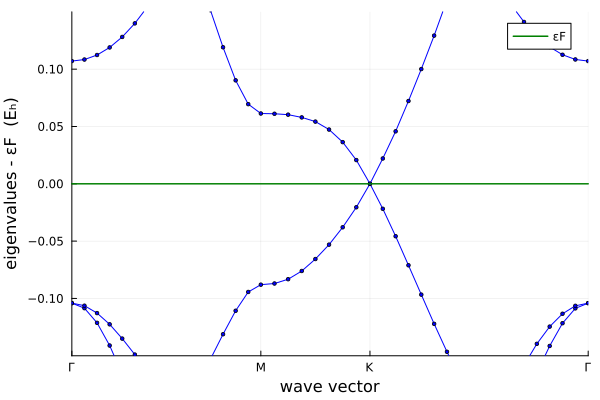

In [1]:
using DFTK
using LinearAlgebra
using Plots
using PseudoPotentialData
using Unitful
using UnitfulAtomic

# Define the convergence parameters (these should be increased in production)
L = 20  # height of the simulation box
kgrid = [6, 6, 1]
Ecut = 15
temperature = 1e-3

# Define the geometry and pseudopotential
a = 4.66  # lattice constant
a1 = a*[1/2,-sqrt(3)/2, 0]
a2 = a*[1/2, sqrt(3)/2, 0]
a3 = L*[0  , 0        , 1]
lattice = [a1 a2 a3]
C1 = [1/3,-1/3,0.0]  # in reduced coordinates
C2 = -C1
positions = [C1, C2]
C = ElementPsp(:C, PseudoFamily("cp2k.nc.sr.pbe.v0_1.semicore.gth"))
atoms = [C, C]

# Run SCF
model = model_DFT(lattice, atoms, positions; functionals=PBE(), temperature)
basis = PlaneWaveBasis(model; Ecut, kgrid)
scfres = self_consistent_field(basis)

# Construct 2D path through Brillouin zone
kpath = irrfbz_path(model; dim=2, space_group_number=13)  # graphene space group number
bands = compute_bands(scfres, kpath; kline_density=20)
plot_bandstructure(bands)